In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
output_dir = 'model_output/dense'
epochs = 4
batch_size = 128
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'
n_dense = 64
dropout = 0.5

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

17465344/17464789 [==============================] - 3s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/sanket/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sanket/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differ

In [5]:
x_train[:5]

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

In [6]:
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
words_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2

In [12]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [13]:
index_word = {v:k for k,v in word_index.items()}

In [15]:
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK themselves powerful lets loves their becomes reaching had journalist UNK lot UNK anyone UNK UNK after UNK atmosphere never more room UNK UNK UNK heart shows UNK years UNK every never going UNK help moments UNK UNK every chest visual UNK except UNK UNK several UNK enough more UNK UNK now current UNK UNK UNK UNK mine potentially unfortunately UNK UNK than him UNK UNK UNK themselves UNK get UNK UNK camp UNK UNK UNK sometimes UNK UNK UNK scary UNK UNK UNK story wonderful UNK UNK seeing UNK character UNK UNK 70s UNK UNK heart had shadows UNK UNK here UNK UNK UNK serious UNK UNK does when UNK why UNK UNK critics UNK UNK UNK UNK isn't UNK will very UNK UNK itself UNK other UNK UNK UNK seen over UNK UNK anyone UNK UNK UNK show's UNK whether UNK than UNK themselves history UNK name half UNK UNK UNK UNK odd UNK two most UNK mean UNK 1 any UNK boat she UNK should UNK thought UNK UNK UNK script UNK UNK while history UNK heart UNK real UNK UNK UNK when UNK UNK bit then UNK two 

In [20]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [22]:
x_train[:6]

array([[1415,    2,    2,    2,    2,  215,    2,   77,   52,    2,    2,
         407,    2,   82,    2,    2,    2,  107,  117,    2,    2,  256,
           2,    2,    2, 3766,    2,  723,    2,   71,    2,  530,  476,
           2,  400,  317,    2,    2,    2,    2, 1029,    2,  104,   88,
           2,  381,    2,  297,   98,    2, 2071,   56,    2,  141,    2,
         194,    2,    2,    2,  226,    2,    2,  134,  476,    2,  480,
           2,  144,    2,    2,    2,   51,    2,    2,  224,   92,    2,
         104,    2,  226,   65,    2,    2, 1334,   88,    2,    2,  283,
           2,    2, 4472,  113,  103,    2,    2,    2,    2,    2,  178,
           2],
       [ 163,    2, 3215,    2,    2, 1153,    2,  194,  775,    2,    2,
           2,  349, 2637,  148,  605,    2,    2,    2,  123,  125,   68,
           2,    2,    2,  349,  165, 4362,   98,    2,    2,  228,    2,
           2,    2, 1157,    2,  299,  120,    2,  120,  174,    2,  220,
         175,  136,   5

In [24]:
' '.join(index_word[id] for id in x_train[0])

"critics UNK UNK UNK UNK isn't UNK will very UNK UNK itself UNK other UNK UNK UNK seen over UNK UNK anyone UNK UNK UNK show's UNK whether UNK than UNK themselves history UNK name half UNK UNK UNK UNK odd UNK two most UNK mean UNK 1 any UNK boat she UNK should UNK thought UNK UNK UNK script UNK UNK while history UNK heart UNK real UNK UNK UNK when UNK UNK bit then UNK two UNK script their UNK UNK nobody most UNK UNK wasn't UNK UNK armed acting watch UNK UNK UNK UNK UNK want UNK"

In [43]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [45]:
n_dim,  n_unique_words, n_dim*n_unique_words

(64, 5000, 320000)

In [46]:
max_review_length, n_dim, n_dim*max_review_length

(100, 64, 6400)

In [47]:
n_dense, n_dim*max_review_length*n_dense+n_dense

(64, 409664)

In [48]:
n_dense + 1

65

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"weights.{epoch:02d}.hdf5")

In [54]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [59]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 1s 7ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 0.6159 - val_accuracy: 0.8323
Epoch 2/4
196/196 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.6723 - val_accuracy: 0.8326
Epoch 3/4
196/196 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7192 - val_accuracy: 0.8329
Epoch 4/4
196/196 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7514 - val_accuracy: 0.8337


In [63]:
model.load_weights('model_output/denseweights.01.hdf5')

In [65]:
y_hat = model.predict(x_valid)

In [66]:
y_hat[0]

array([0.06195229], dtype=float32)

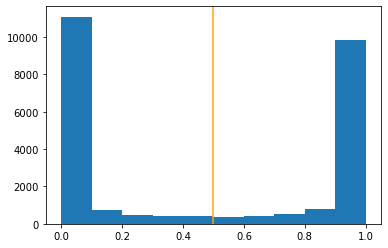

In [67]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [69]:
pct_auc = roc_auc_score(y_valid, y_hat) * 100.0

In [70]:
"{:0.2f}".format(pct_auc)

'91.57'

In [71]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])

In [72]:
ydf = pd.DataFrame(list(zip(float_y_hat, y_valid)), columns=['y_hat', 'y'])

In [73]:
ydf.head(10)

,y_hat,y
0,0.061952,0
1,0.999987,1
2,0.997920,1
3,0.073755,0
4,0.999998,1
5,0.872675,1
6,0.999294,1
7,0.000018,0
8,0.999029,0
9,0.993162,1


In [82]:
(all_x_train, _), (all_x_valid, _) = imdb.load_data(num_words=n_unique_words)

In [83]:
' '.join(index_word[id] for id in all_x_valid[0])

"START wonder own as by is sequence i i UNK UNK to of hollywood br of down UNK getting boring of ever it sadly sadly sadly i i was then does don't close UNK after one carry as by are be UNK all family turn in does as three part in another some to be probably with world UNK her an have UNK beginning own as is sequence"

In [84]:
ydf[(ydf.y == 0) & (ydf.y_hat>0.9)].head(10)

,y_hat,y
8,0.999029,0
75,0.997258,0
112,0.963229,0
139,0.981661,0
152,0.999917,0
156,0.998398,0
256,0.996485,0
260,0.904034,0
299,0.987475,0
310,0.960320,0
